In [ ]:
%%shell
jupyter nbconvert --to html "/content/CM_3060_Benjamin_NLP_Midterms.ipynb"

#CM3060 Natural Language Processing Midterm Coursework
##Comparative Text Classification using statistical and embedding-based models
### Done by Benjamin Lee UOL ID:220516503


### Outline:
I. Introduction
- Domain-specific area
- Objectives
- Dataset Description
- Evaluation methodology

---


II. Implementation
- Data Preprocessing
- Baseline Performance
- Comparative Classification methodology
- Programming style


---


III. Conclusions
- Performance Analysis & Comparative Discussion
- Project Summary and Reflections




# I.INTRODUCTION

## Domain-Specific Area: Fake News Classification

Text classification, also known as text categorization, is a critical task in natural language processing (NLP) that involves assigning predefined categories to text data. This task finds applications in various domains, including sentiment analysis, spam detection, authorship attribution, and fake news detection​​. The significance of solving these problems is immense across multiple fields such as business, politics, education, healthcare, and security​​.


>**Reference :Shu, K., Wang, S., & Liu, H. (2019, January). Beyond news contents: The role of social context for fake news detection. In Proceedings of the twelfth ACM international conference on web search and data mining (pp. 312-320**).

In this coursework, we focus on the problem of fake news detection. The proliferation of fake news on social media and other platforms poses a severe threat to public opinion, leading to misinformation and potential societal harm​​. Identifying and mitigating fake news is crucial to maintaining the integrity of information disseminated to the public. Previous studies have shown that automated detection of fake news can significantly aid in curbing the spread of misinformation​​. Therefore, developing effective text classification models for fake news detection is a highly relevant and impactful endeavor​​.



## 2. Setting of objectives

Fake news detection problem requires completing tasks as: loading of the dataset; data pre-processing - cleaning, analyzing, vectorization; visualization; building classification model that can confidently distinguish between true and fake news, analyzing performance along with improvements suggestions. Named requires both theoretical knowledge, and practical skills gaining. From the perspective of *theoretical background*, I have to understand:

-	Text classification concept and techniques in Natural Language Processing (NLP)
-	Connected concepts: tokens, collocations, n-grams, synsets
-	Bayes Theorem and Naïve Bayes Classifier principle
-	TF-IDF metric concept and text vectorization
-	Related KPIs and metrics of text categorization success

In terms of *practical skills* needed to performed named tasks, I set up objective to learn to:

1.	Perform operations with Data Frames containing textual data:
    -	Filtering operations
    -	Joining of two and more Data Frames together
    -	Group by operations
    -	Summarizing
    
    
2.	Confidently use NLTK library:
    -	Sentence and word tokenization
    -	Lemmatization and stemming
    -	N-gramms creation
    -	Frequency distribution calculation
    
    
3.	Understand and use regular expressions


4.	Textual data visualization


5.	Build and evaluate models with Scikit learn:
    - Feature extraction
    - Fit Multinomial Naïve Bayes Classifier on the data
    - Calculate metrics


## 3. Brief dataset description

The source of the data: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

Dataset consists of two .csv files: one for fake and one for true news. Structure of both files is identical – 4 columns: title, text, subject and date. Title column contains the headline, text column contains news body, subject and date – subject and release date of the news respectively. Even though logically the last column should be of date type, it belongs to the string, just like the first 3 columns – fixing of the data types is a part of cleaning procedure. Overall dataset is balanced – 23481 fake news (52.3%) and 21417 true news (47.7%). True news is equally divided into two categories - world news and politics news,  whilst fake news poses 6 categories: government news, middle east, news, US news, left news and politics. The source of the true news is reuter.com (news site), while fake dataset was collected from the variety of unreliable outlet resources posting fake news and marked by Wikipedia and Politifact. Collected news belong to the period from mid 2015 till early 2018.



## 4. Comments on the choice of evaluation strategy

Evaluation strategy depends on the problem - for continuous and discrete output different metrics suits, moreover there could be some specific approaches depending on the exact problem. Evaluation strategy has 2 purposes: evaluate ability of the model to generalize (pure performance) and highlighting possible week sides of the model and/or dataset, potential improvements suggestion. Classification with Naïve Bayes Classifier output discrete result – 0 (True news ) or 1 (Fake news). Hence, speaking of performance metrics, the best choice would be accuracy (overall and per category), precision, recall and F1 score. Together with that confusion matrics is the best approach to visualize model performance. Another way to evalute performance is to read and analyze mispredicted by myself.

Baseline performance I aim to achieve is 90%+ accuracy. I think that as long as I cannot perform any changes on dataset (meaning change source, get more samples, etc.) and this work is for academic puposes exclusively this is quite reasonable level. Together with that, I plan to use modern hybrid deep learning model of Word2Vec + LSTM to compare with my baseline for evaluation and comparison.
<br>Precision</b>
The precision of a model can be understood as the measure of predicted positives out of the actual positives.

$$ Precision = {True Positive(TP) \over True Positive(TP) + False Positive(FP)} $$

<b>Recall</b>
The Recall of a model can be understood as the measure of correctly identified true positives. The formula for this is,

$$ Recall = {True Positive(TP) \over True Positive(TP) + False Negative(FN)} $$

<b>F-1 Score</b>
The F-1 Score/Measure can be understood as the harmonic mean of both the precision and recall. The formula for this is,

$$ F1 = 2 * {Precision(P) * Recall(R) \over Precision(P) + Recall(R)} $$

Given these 3 evaluation metrics and our objective of being able to help users gauge if a movie is worth the time invested, I have chosen to focus on having a <b>higher</b> precision score in my model as this will allow it to identify the highest precision of fake news.




# II. IMPLEMENTATION

## 1. Dataset presenation and visualisation

#### Preparations and first glance

Here are all the libraries used for the coursework.

In [11]:
#general
import numpy as np
import pandas as pd
import re
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')



#nlp
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')

#visualization
from collections import Counter
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
%pip install wordcloud
from wordcloud import WordCloud

#ML
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from pylab import rcParams
rcParams['figure.figsize'] = 14, 6
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, SpatialDropout1D, InputLayer
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec


%matplotlib inline


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading of 2 .csv files containing fake and true news respectively:

In [12]:
#fake = pd.read_csv('fake.csv')
#true = pd.read_csv('true.csv')

# Access the file from Google Drive and load it
fake_file_path = '/content/drive/MyDrive/Fake.csv'
true_file_path = '/content/drive/MyDrive/True.csv'

fake = pd.read_csv(fake_file_path)
true = pd.read_csv(true_file_path)

Brief presentaion of the content of 2 files:

In [13]:
print("Fake dataset contains:", len(fake), "news")
fake.head()

Fake dataset contains: 23481 news


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [14]:
print("True dataset contains:", len(true), "news")
true.head()

True dataset contains: 21417 news


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Joining 2 datasets in one and random shuffle. In order not to distinguish between 2 fake and true news, I add a column with respective class in advance, before joining.

As I try to answer the question 'Is this news fake?', I assign labels as following:

- Fake label: 1
- True label: 0

In [15]:
### adding column with lable to each data set
fake['class'] = 1
true['class'] = 0

#put two dataframes together and shuffle
dataset = (pd.concat([fake, true])).sample(frac=1).reset_index(drop=True)
backup_original = dataset
backup = backup_original

In [16]:
dataset.head()

,title,text,subject,date,class
0,CNN Guest SMACKS DOWN Trump Supporter For Rac...,Infamous Donald Trump surrogate and supporter ...,News,"August 30, 2016",1
1,"Trying to reset agenda, UK's May sets out to t...","MANCHESTER, England (Reuters) - Prime Minister...",worldnews,"October 2, 2017",0
2,Notorious RBG Throws AMAZING Shade At Trump F...,We love Ruth Bader Ginsburg. She s the sweet ...,News,"November 10, 2016",1
3,Trump Supporter Scott Baio Makes SHOCKINGLY I...,"On Saturday, the internet was shocked to learn...",News,"April 24, 2017",1
4,Trump conversation with Taiwan president a 'co...,WASHINGTON (Reuters) - U.S. President-elect Do...,politicsNews,"December 4, 2016",0


#### Structure of the dataset

Dataset from the class (true/fake) and subject perspectives.

In [20]:
#get the list of unique subjects and see what are true and fake
unique_subj = pd.DataFrame(dataset.groupby('subject')['title'].count()).rename(columns = {'title':'count'})
unique_class = pd.DataFrame(dataset.groupby('class')['title'].count()).rename(columns = {'title':'count'})

unique_subj_n_class = pd.DataFrame(dataset.groupby(['class', 'subject'])['title'].count()).rename(columns = {'title':'count'})

In [21]:
unique_subj

,count
subject,
Government News,1570
Middle-east,778
News,9050
US_News,783
left-news,4459
politics,6841
politicsNews,11272
worldnews,10145


Class perspective:

In [9]:
unique_class

,count
class,
0,21417
1,23481


Table above shows that dataset is quite balanced - each class constitues nearly a half of it: 21.5 thousands true news and 23.5 thousands of fake news. I find it even better that fake news dataset is somehwat bigger as the task of the coursework is succesfully detect fake news first.

Subject and class perspective combined:

In [10]:
print("Quantity of subjects:", len(unique_subj_n_class))
unique_subj_n_class

Quantity of subjects: 8


count
class subject               
0     politicsNews     11272
      worldnews        10145
1     Government News   1570
      Middle-east        778
      News              9050
      US_News            783
      left-news         4459
      politics          6841

As per table above, dataset consists of 8 uniqe subjects. 6 of them constitutes fake news and 2 - true news. True news is equally divided between world news and politics, while fake news dataset has quite unbalnced structure in terms of quantity of news in each topic (subject).

Visulization:

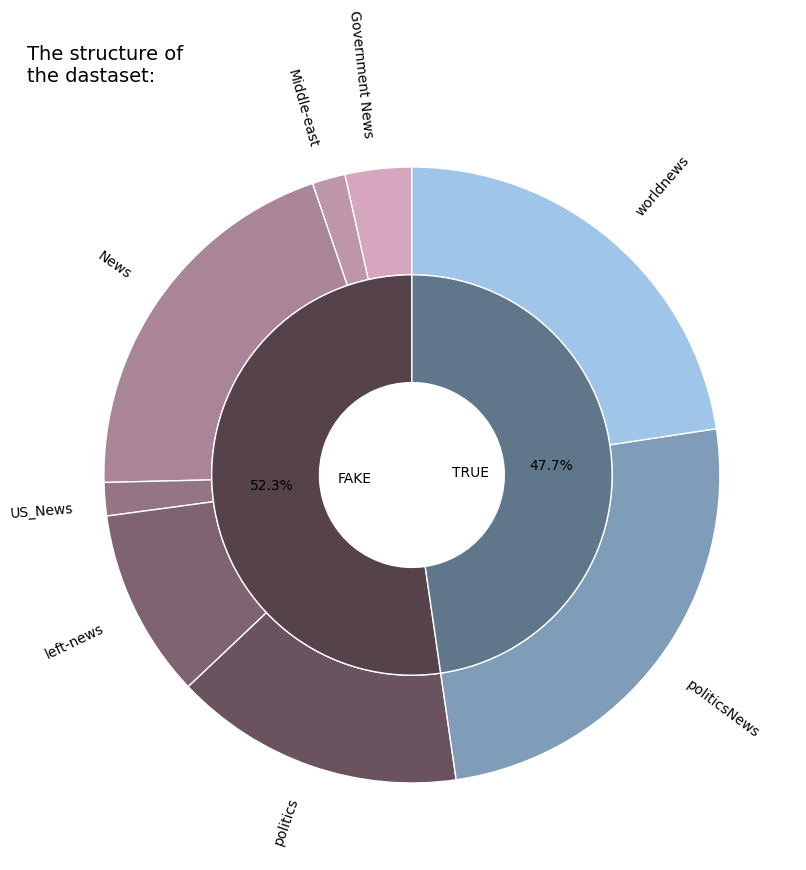

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
size = 0.35

colours_class = ['#55424b', '#5f768b']
colours_subj = ['#d5a6bd', '#bf95aa', '#aa8497', '#957484', '#7f6371', '#6a535e', '#7f9db9','#9fc5e8']

explode_class = (0.09,0.09)
explode_subj = [0.03 for x in range (0, 8)]


#outer pie
ax.pie(unique_subj.values.flatten(), radius=1,
       labels = unique_subj.index,
       colors = colours_subj,
       startangle = 90,
       rotatelabels = True,
       wedgeprops=dict(width=size, edgecolor='w'))

#inner pie
ax.pie(unique_class.sort_index(ascending = False).values.flatten(), radius=1-size,
       labels = ['FAKE','TRUE'],
       colors = colours_class,
       autopct='%1.1f%%',
       pctdistance = 0.7,
       labeldistance=0.2,
       startangle = 90,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal")
plt.title('The structure of \nthe dastaset:', fontsize = 14, loc = 'left')
plt.rcParams['font.size'] = 12
plt.show()

The plot above visually confirms that dataset is balanced - fake and true news both account for the roughly half of the datasamples - 52.3% and 47.7% respectively.

The sources of ideas for nested asymmetrical piechart:  
1. https://stackoverflow.com/questions/67210640/how-can-i-draw-a-nested-pie-graph-in-matplotlib-in-python
2. https://jingwen-z.github.io/data-viz-with-matplotlib-series3-pie-chart/

#### Data distribution in time

The last column left without a comment is a column with date in which news was published. In order to present how news are distributed in time, some pre-processing is required:


In [22]:
print("Date column is not formatted properly:\n")
dataset.info()

Date column is not formatted properly:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


Together with inappropriate formatting, we need to check whether all the values in date column follows the same pattern. To manage this task I will use the following libraries:
1. **RegEx** to detect outliars in date column

2. **datetime** library to convert date from format `month dd, yyyy` and `dd-mmm-yyyy` to `dd-mm-yyyy`
    - i.e. `January 10, 2000` to `2000-01-10` or `21-Feb-1997` to `1997-02-21`

In [13]:
# find and filter out the outliers
pattern = r"(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)" #r"(\w* \d*, \d*)" #|(\d*-\w*-\d*)
dataset['check'] = dataset['date'].str.contains(pattern)
outliers0 = dataset[dataset['check']==False].iloc[:,:5]
dataset = dataset[dataset['check']==True].iloc[:,:5]
print("First of all, here are the caught outliers: \n")
outliers0.head()

<ipython-input-13-eb3cb89317cf>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dataset['check'] = dataset['date'].str.contains(pattern)


First of all, here are the caught outliers: 



,title,text,subject,date,class
2550,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,1
14470,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,1
18916,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,1
21008,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,1
23005,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,1


In [14]:
from dateutil import parser
import pandas as pd

# Function to parse dates
def parse_date(date_str):
    try:
        return parser.parse(date_str)
    except ValueError:
        return None

# Apply the date parser to the dataset
dataset['date'] = dataset['date'].apply(parse_date)

# Check for any parsing errors
parsing_errors = dataset[dataset['date'].isnull()]
if len(parsing_errors) > 0:
    print("Rows with parsing errors:")
    print(parsing_errors)

# Remove rows with parsing errors if any
dataset = dataset.dropna(subset=['date'])

backup = dataset.copy()
print("Formatted dataset:")
print(dataset.head())


Formatted dataset:
                                               title  \
0  BREAKING: 5 People Shot At Anti-Trump Protest…...   
1  WWII VET Asks Basketball Legend Bobby Knight A...   
2             Norway receives first F-35 fighter jet   
3  INTOLERANT GAY COUPLE Kicked Off Flight For SC...   
4  BREAKING: CRUZ AND KASICH Announce Plan To Tak...   

                                                text    subject       date  \
0  This is 1 of 7 anti-Trump rallies raging acros...   politics 2016-11-09   
1  A World War II veteran attended the Trump rall...   politics 2016-04-27   
2  OSLO (Reuters) - Norway on Friday received the...  worldnews 2017-11-10   
3  From TMZIvanka Trump just had a bumpy start to...   politics 2016-12-22   
4  As the GOP paves the way for Hillary The campa...   politics 2016-04-25   

   class  
0      1  
1      1  
2      0  
3      1  
4      1  


In order to plot data, I need 2 separates subsets - true and fake:

In [15]:
subset_fake = dataset[dataset['class']==1].groupby('date').count().iloc[:,:1]
subset_true = dataset[dataset['class']==0].groupby('date').count().iloc[:,:1]

Plotting process:

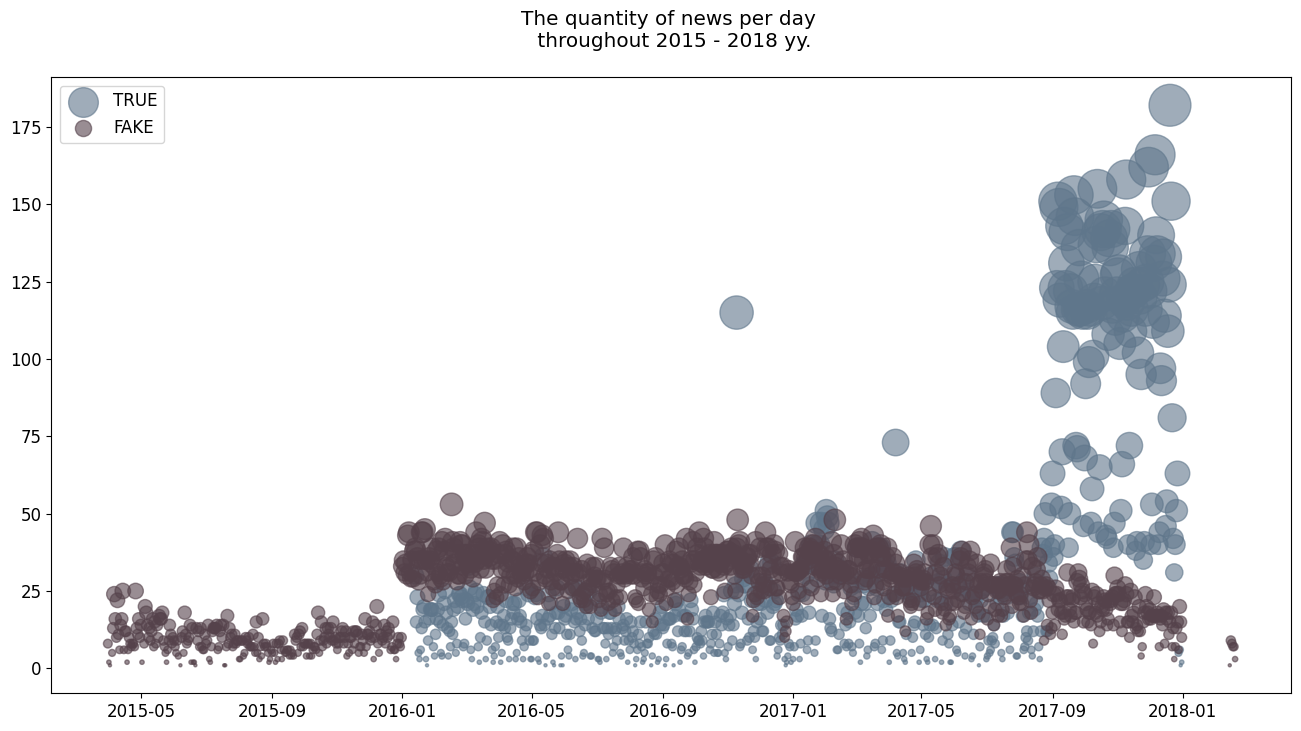

In [16]:
register_matplotlib_converters()

fig, ax = plt.subplots(figsize=(16,8))
colours = ['#55424b', '#5f768b']
sizes_true = subset_true.iloc[:, 0]*5
sizes_fake = subset_fake.iloc[:, 0]*5
plt.scatter(subset_true.index, subset_true.iloc[:, 0],
            color = colours[1], label = "TRUE", alpha = 0.6,
            s = sizes_true)
plt.scatter(subset_fake.index, subset_fake.iloc[:, 0],
            color = colours[0], label = "FAKE", alpha = 0.6,
            s = sizes_fake)
plt.title("The quantity of news per day \n throughout 2015 - 2018 yy.\n")
plt.legend(loc = 'upper left')
plt.show()

Chart shows that true news presented in dataset were released throughout the period of eraly 2016 - early 2018, while fake news was take from the whole mid 2015 - eraly 2018 period. Moreover, according to the big spike to the left it is evident that majority of the true news is quite fresh.

## 2. Data cleaning and deeper analytics

### 2.1. Simple statistics:
Before dat cleaning, it would be interesitng tocompare the differences between 2 categories (if they are) with the help of some statistical metrics:
- average length* on the news
- standard deviation of the news length
- lexical diversity of the sets
- top 10 from frequency distribution

*length in words

I do this also and after data cleaning.

Here is a custom function that takes news column as input and return a dictionary with average length, standard deviation, maximum and minimum of the news lengths.

In [17]:
#custom helping function #1
def statistics_numbers(column):

    res_dict = {}
    news_len_list = [len(news.split()) for news in column]

    res_dict['Average length'] = int(np.mean(news_len_list))
    res_dict['std'] = int(np.std(news_len_list))
    res_dict['Max length'] = np.max(news_len_list)
    res_dict['Min length'] = np.min(news_len_list)

    for i in res_dict:
        print(i, ":", res_dict[i])

    return res_dict

The second function takes tokenized to words news and return anoth dictionary that contains lexical diversity metric and list of 10 most common tokens.

In [18]:
#custom helping function #2
def statistics_textual(words):
    res_dict = {}
    res_dict['Lexical diversity'] = np.round(len(set(words))/len(words), 4)
    res_dict['10 the most common tokens'] = nltk.FreqDist(words).most_common()[:10]

    for i in res_dict:
        print(i, ":", res_dict[i])

    return res_dict


Some data pre-processing is required:

In [19]:
#preparation of the data need for statistics metrics calculations:

#separate subsets (here columns) of true and fake news
true_news_col = dataset[dataset['class']==0]['text']
fake_news_col = dataset[dataset['class']==1]['text']

# columns with news converted to lists of words
string_true = str(true_news_col.tolist())
string_fake = str(fake_news_col.tolist())

#news tokenized to words
words_true = nltk.word_tokenize(string_true)
words_fake = nltk.word_tokenize(string_fake)


In [20]:

print("True set statistics:\n")
true_statistic_dict = statistics_numbers(true_news_col)
true_text_stat_dict = statistics_textual(words_true)

print("\n-----\n")

print("Fake set statistics:\n")
fake_statistic_dict = statistics_numbers(fake_news_col)
fake_text_stat_dict = statistics_textual(words_fake)


True set statistics:

Average length : 385
std : 273
Max length : 5172
Min length : 0
Lexical diversity : 0.011
10 the most common tokens : [(',', 427680), ('the', 423433), ('.', 311268), ('to', 244345), ('of', 204566), ('a', 188047), ('and', 179936), ('in', 170268), ('on', 105320), ('s', 99620)]

-----

Fake set statistics:

Average length : 423
std : 408
Max length : 8135
Min length : 0
Lexical diversity : 0.0183
10 the most common tokens : [(',', 507165), ('the', 483871), ('.', 297039), ('to', 287020), ('of', 233766), ('and', 214709), ('a', 203635), ('in', 154161), ('that', 143479), ('s', 128870)]


Comments:
1. Both fake, and true sets apparently has some outliars:
    - std of length is quite high for both categories:
        - for fake news in particular it is the same as average length of the news
    - the shortest news of both categories is actualy no news, empty cell


2. I find it interesting that lexical diversity of the fake news is a little bit higher than of the true news. I anticipated true news set to have way higher value of the metric than fake news set.


3. As expected, before cleaning exactely stopwords and punctuiation constitues top 10 most common words for both sets.


### 2.2. Cleaning:
**The standard cleaning involves the following steps**:
- outliers detection (e.g. news with less than 10 tokens)
- lower case
- removing confusing tokens like:
    - stopwords
    - punctuation
    - URLs, e-mails, accounts mentioning/tagging (e.g @name)
    - unicode charachters
- normalize text:
    - lemmatization and (or) stemming

In [21]:
print('The dataset after formatted date before cleaning:')
old_length = len(dataset)
dataset.head()

The dataset after formatted date before cleaning:


,title,text,subject,date,class
0,BREAKING: 5 People Shot At Anti-Trump Protest…...,This is 1 of 7 anti-Trump rallies raging acros...,politics,2016-11-09,1
1,WWII VET Asks Basketball Legend Bobby Knight A...,A World War II veteran attended the Trump rall...,politics,2016-04-27,1
2,Norway receives first F-35 fighter jet,OSLO (Reuters) - Norway on Friday received the...,worldnews,2017-11-10,0
3,INTOLERANT GAY COUPLE Kicked Off Flight For SC...,From TMZIvanka Trump just had a bumpy start to...,politics,2016-12-22,1
4,BREAKING: CRUZ AND KASICH Announce Plan To Tak...,As the GOP paves the way for Hillary The campa...,politics,2016-04-25,1


###### 1. Dealing with too short news

This is clear that legitimate news cannot by empty or contain less than at least several words.

In [22]:
#keep rows containing more than 30 symbols

In [23]:
outliers1 = dataset[dataset['text'].str.len()<=30]
outliers1.head()

,title,text,subject,date,class
18,WOW! ONE COURAGEOUS MAN Stands Against Rioters...,,left-news,2016-11-11,1
24,YOU’LL LOVE MIKE ROWE’S Awesome Response To An...,,left-news,2016-12-15,1
38,CNN’S FAREED ZAKARIA Busts Out a Profanity Fil...,,politics,2017-03-18,1
110,FAKE CNN and MSNBC Caught Claiming “LIVE” Gues...,,politics,2017-03-23,1
126,BLACK FRIDAY SPECIAL: Computer Keyboard For Lo...,,politics,2016-11-25,1


In [24]:
print("Outliers quantity:", len(outliers1))

Outliers quantity: 702


In [25]:
outliers1[outliers1['class']==0]

,title,text,subject,date,class
15235,Graphic: Supreme Court roundup,,politicsNews,2016-06-16,0


I got 702 news with little or no text at all, only 1 of them belongs to the true news set. Complete deleting of the rows will lead to decreasing class 0 training examples and make the dataset less balanced. As potentially it may lead to worth generalization on fake data, I will not delete these data samples, but concatenate text field with the title of ALL news in the dataset.

In [26]:
dataset['text'] = dataset['title'] + ' ' + dataset['text']
backup = dataset
dataset.drop(['title','subject'], axis = 1, inplace = True)
dataset.head()

,text,date,class
0,BREAKING: 5 People Shot At Anti-Trump Protest…...,2016-11-09,1
1,WWII VET Asks Basketball Legend Bobby Knight A...,2016-04-27,1
2,Norway receives first F-35 fighter jet OSLO (R...,2017-11-10,0
3,INTOLERANT GAY COUPLE Kicked Off Flight For SC...,2016-12-22,1
4,BREAKING: CRUZ AND KASICH Announce Plan To Tak...,2016-04-25,1


In [27]:
dataset = dataset[dataset['text'].str.len()>30] #check for outliers again
updated_length = len(dataset)
print("Rows missed while outliers fixing:", old_length - updated_length)

Rows missed while outliers fixing: 0


##### 2. Lowering case

In [28]:
dataset['text'] = dataset['text'].str.lower()
dataset.head()

,text,date,class
0,breaking: 5 people shot at anti-trump protest…...,2016-11-09,1
1,wwii vet asks basketball legend bobby knight a...,2016-04-27,1
2,norway receives first f-35 fighter jet oslo (r...,2017-11-10,0
3,intolerant gay couple kicked off flight for sc...,2016-12-22,1
4,breaking: cruz and kasich announce plan to tak...,2016-04-25,1


##### 3. Removing confusing tokens

*Sources of code or/and ideas for this section:*
1. Stopwords and punctuiation removing : https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe
2. Removing of Unicode charachters, URLs, e-mail addresses, taggig: https://monkeylearn.com/blog/text-cleaning/ , https://regexr.com/


1. Stopwords and punctuation

In [24]:
stopwords_news = list(stopwords.words('english'))
stopwords_news[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [25]:
backup = dataset
dataset['text'] = dataset['text'].apply(lambda row: " ".join([word for word in row.split() if word not in stopwords_news and word.isalnum()]))
dataset.head()

,title,text,subject,date,class
0,Israel endorses independent Kurdish state,JERUSALEM Israel supports establishment Kurdis...,worldnews,"September 13, 2017",0
1,Senior Democratic National Committee officials...,NEW Three senior officials Democratic National...,politicsNews,"August 2, 2016",0
2,LOL! TRUMP TWEETS Hilarious Message To #Crooke...,President Trump Saturday criticized Hillary De...,politics,"Nov 18, 2017",1
3,Democrats in Congress brace for new Iran nucle...,WASHINGTON As Congress faces possible fight fu...,worldnews,"September 20, 2017",0
4,OVER 100 COLLEGES WILL HOLD SEPARATE GRADUATIO...,A Of Obama Divided America The LGBT community ...,politics,"Apr 29, 2016",1


2. Removing of e-mail addresses, URLs, @ tagging and unicode charachters

In [26]:
pattern0 = r"[^\x00-\x7F]+\ *(?:[^\x00-\x7F]| )*" #unicode
pattern1 = r"(https?:\/\/)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)" #URL
pattern2 = r"(^|\W)@\b([-a-zA-Z0-9._]{3,25})\b" #tagging
#e-mail
pattern3 = r"[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*@(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?"

patterns = [pattern0, pattern1, pattern2, pattern3]

backup = dataset

for pattern in patterns:
    dataset['text']= dataset['text'].apply(lambda x: re.sub(pattern, " ", x))

dataset.head()

,title,text,subject,date,class
0,Israel endorses independent Kurdish state,JERUSALEM Israel supports establishment Kurdis...,worldnews,"September 13, 2017",0
1,Senior Democratic National Committee officials...,NEW Three senior officials Democratic National...,politicsNews,"August 2, 2016",0
2,LOL! TRUMP TWEETS Hilarious Message To #Crooke...,President Trump Saturday criticized Hillary De...,politics,"Nov 18, 2017",1
3,Democrats in Congress brace for new Iran nucle...,WASHINGTON As Congress faces possible fight fu...,worldnews,"September 20, 2017",0
4,OVER 100 COLLEGES WILL HOLD SEPARATE GRADUATIO...,A Of Obama Divided America The LGBT community ...,politics,"Apr 29, 2016",1


##### 4. Text normalization
*Sources of code or/and ideas for this section:*
1. Text normalization resources: class notes, Topic 2

Lemmatizing words:

In [32]:
wnl = WordNetLemmatizer()

In [33]:
backup = dataset
# Ensure all entries in 'text' column are strings
dataset["text"] = dataset["text"].astype(str)

#Tokenize and lemmatize the text
dataset["text"] = dataset["text"].apply(lambda x: nltk.word_tokenize(x))
dataset["text"] = dataset["text"].apply(lambda x: " ".join([wnl.lemmatize(w) for w in x]))
dataset.head()

,text,date,class
0,5 people shot critical condition 1 7 rally rag...,2016-11-09,1
1,wwii vet asks basketball legend bobby knight q...,2016-04-27,1
2,norway receives first fighter jet oslo norway ...,2017-11-10,0
3,intolerant gay couple kicked flight screaming ...,2016-12-22,1
4,cruz kasich announce plan take trump gop pave ...,2016-04-25,1


And the last step is filtering out too short news that may occure again after data cleaning.

In [34]:
old_length = len(dataset)
dataset = dataset[dataset['text'].str.len()>30]
new_length = len(dataset)
print("Rows missed while outliers fixing:", old_length - updated_length)

Rows missed while outliers fixing: 0


In [27]:
dataset.head()

,title,text,subject,date,class
0,Israel endorses independent Kurdish state,JERUSALEM Israel supports establishment Kurdis...,worldnews,"September 13, 2017",0
1,Senior Democratic National Committee officials...,NEW Three senior officials Democratic National...,politicsNews,"August 2, 2016",0
2,LOL! TRUMP TWEETS Hilarious Message To #Crooke...,President Trump Saturday criticized Hillary De...,politics,"Nov 18, 2017",1
3,Democrats in Congress brace for new Iran nucle...,WASHINGTON As Congress faces possible fight fu...,worldnews,"September 20, 2017",0
4,OVER 100 COLLEGES WILL HOLD SEPARATE GRADUATIO...,A Of Obama Divided America The LGBT community ...,politics,"Apr 29, 2016",1


### 2.3. Visualization and deeper analysis

##### 1. Simple statistics and visulazation

Some data pre-processing is required:

In [36]:
#preparation of the data need for statistics metrics calculations:

#separate subsets (here columns) of true and fake news
true_news_col_c = dataset[dataset['class']==0]['text']
fake_news_col_c = dataset[dataset['class']==1]['text']

# columns with news converted to lists of words
string_true_c = str(true_news_col_c.tolist())
string_fake_c = str(fake_news_col_c.tolist())

#news tokenized to words
words_true_c = nltk.word_tokenize(string_true_c)
words_fake_c = nltk.word_tokenize(string_fake_c)


In [37]:

print("True set statistics:\n")
true_statistic_dict_c = statistics_numbers(true_news_col_c)
true_text_stat_dict_c = statistics_textual(words_true_c)

print("\n-----\n")

print("Fake set statistics:\n")
fake_statistic_dict_c = statistics_numbers(fake_news_col_c)
fake_text_stat_dict_c = statistics_textual(words_fake_c)


True set statistics:

Average length : 192
std : 128
Max length : 1912
Min length : 12
Lexical diversity : 0.0127
10 the most common tokens : [('said', 72049), ('trump', 38542), ('would', 31585), ('state', 28062), ('president', 24213), ("'", 21431), (',', 21415), ('republican', 20603), ('new', 17216), ('government', 16558)]

-----

Fake set statistics:

Average length : 198
std : 189
Max length : 4052
Min length : 4
Lexical diversity : 0.0135
10 the most common tokens : [('trump', 70518), ("'", 23543), ('would', 23487), (',', 23383), ('president', 23260), ('people', 22832), ('one', 22689), ('said', 21404), ('state', 18005), ('like', 17741)]


In [38]:
df_stat_true = pd.DataFrame.from_dict(true_statistic_dict, orient='index',
...                        columns=['True, before'])
df_stat_true = df_stat_true.join(pd.DataFrame.from_dict(true_statistic_dict_c, orient='index',
...                        columns=['True, after']))
df_stat_true

,"True, before","True, after"
Average length,385,192
std,273,128
Max length,5172,1912
Min length,0,12


After cleaning average lenth of the true news is almost 2 times less. For part of the missed length punctuation is accounted, another part consists of stopwords, and probably some small amount of removed tokens are links and references, however I stil find this very extraordinary that, in average, half of the news body carries neraly 0 sence. Are our languages that efficient as we think of them? The biggest news message was cut more than by half, while empty rows were succesfully

In [39]:
df_stat_fake = pd.DataFrame.from_dict(fake_statistic_dict, orient='index',
...                        columns=['Fake, before'])
df_stat_fake = df_stat_fake.join(pd.DataFrame.from_dict(fake_statistic_dict_c, orient='index',
...                        columns=['Fake, after']))
df_stat_fake

,"Fake, before","Fake, after"
Average length,423,198
std,408,189
Max length,8135,4052
Min length,0,4


In [40]:
#visualizations and comments

Comments..

##### 2. Wordcloud

*Sources of code or/and ideas for this section:*
1. Word cloud: https://www.datacamp.com/community/tutorials/wordcloud-python


Function that takes string, title, color and number of maximum number words to be plotted as input and perform world cloud visulasation per given argumets.

In [41]:
def build_wordcloud(text, title, color, max_words):
    wordcloud = WordCloud(max_font_size = 100, max_words = max_words, background_color = color).generate(text)
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()


Data preparation:

In [42]:
#coverting columns with news to strings: all news together and 2 separate strings for true and fake
all_news = " ".join(dataset["text"])
true_news = " ".join(dataset[dataset["class"]==0]["text"])
fake_news = " ".join(dataset[dataset["class"]==1]["text"])

color = "white"
max_words = 100

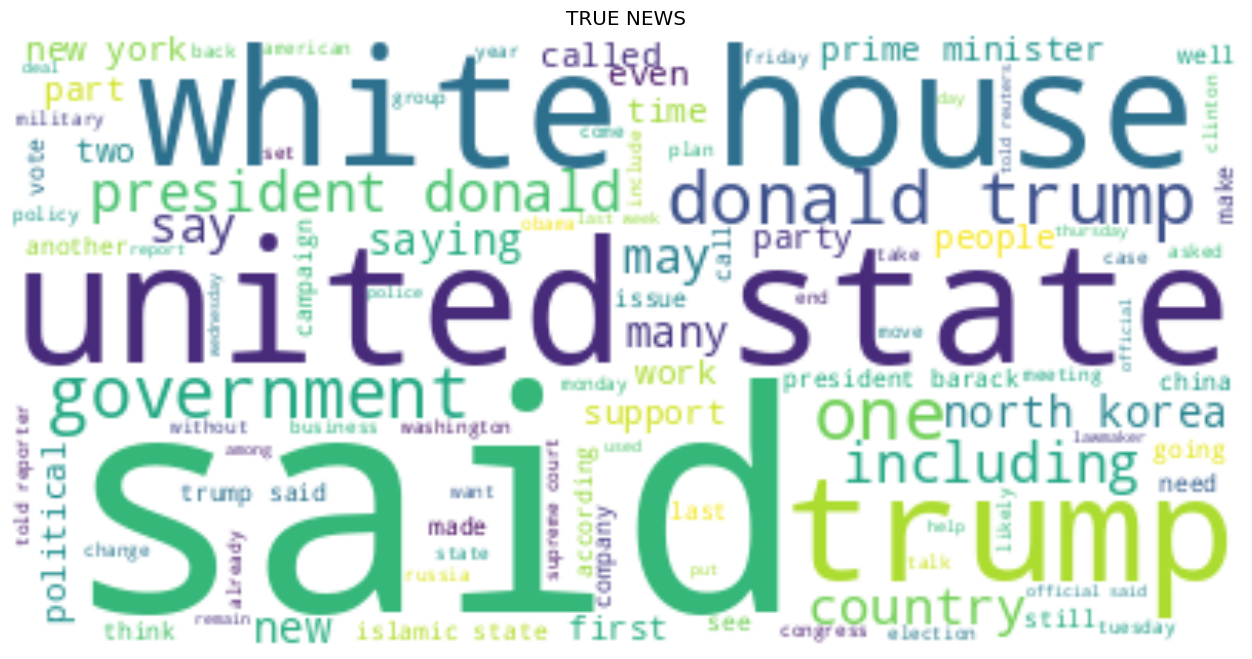

In [43]:
title = "TRUE NEWS"
build_wordcloud(true_news, title, color, max_words)

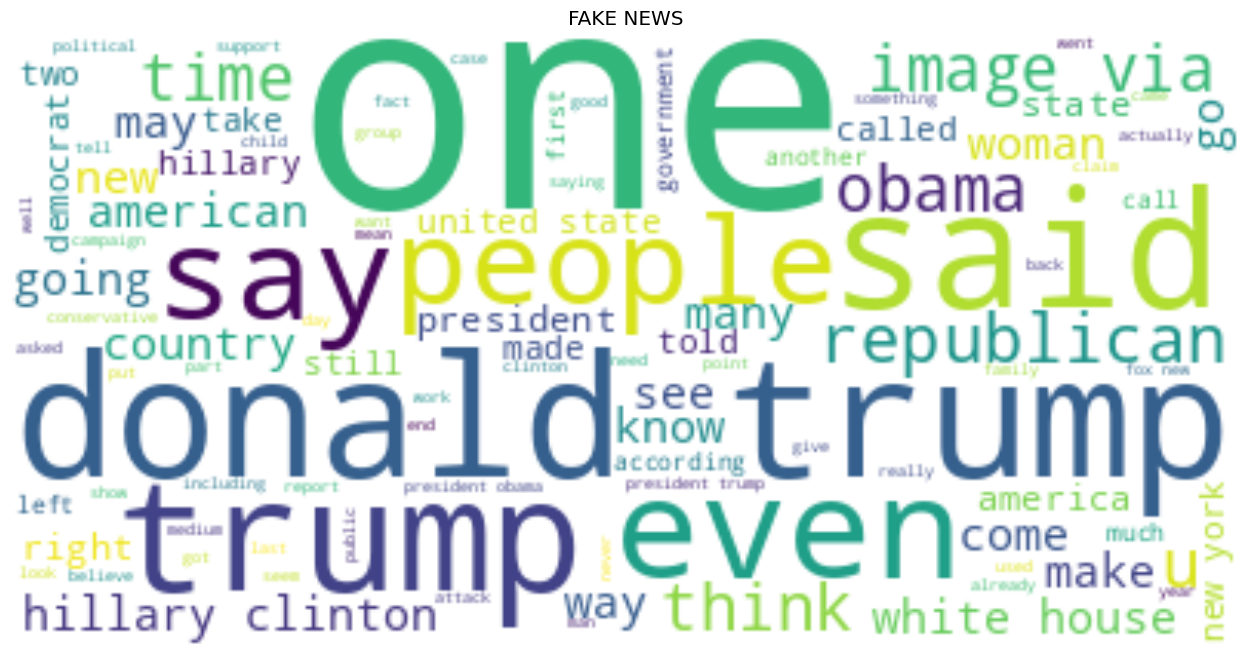

In [44]:
title = "FAKE NEWS"
build_wordcloud(fake_news, title, color, max_words)

Word cloud visulasations shows that the main newsmaker was Donald Trump - USA president at that time - it leads in both datasets. Another similarity is the most prominent collocations, those are are 'united state', 'white house' and 'president trump' for true and for fake news sets. Also both clouds share the most common verb ehich is 'say' in different tenses and forms. Deeper collocation analysis I perfrom below.

##### 3. Collocations

*Sources of code or/and ideas for this section:*
1. N-grams: class notes (Topic 3)

**Bi-grams**:

True news bi-grams

In [22]:

import string

# Function to preprocess text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    return tokens

# Function to extract bigrams from text data
def get_bigrams(text_column):
    bigrams = []
    for text in text_column:
        tokens = preprocess_text(text)
        bigrams.extend(nltk.bigrams(tokens))
    return bigrams

# Function to plot collocations
def plot_collocations(df, qty, title, color):
    df.head(qty).set_index('bigram').plot(kind='bar', figsize=(15, 8), color=color, fontsize=12, legend=False)
    plt.title(title, fontsize=15)
    plt.show()

# Ensure the dataset is correctly loaded and preprocessed

# Combine true news text
true_news_texts = dataset[dataset['class'] == 0]['text'].tolist()
true_news_text = " ".join(true_news_texts)

# Extract and count bigrams
true_news_bigrams = get_bigrams([true_news_text])
true_news_bigrams_count = Counter(true_news_bigrams)

# Convert to DataFrame
true_news_bigrams_df = pd.DataFrame(true_news_bigrams_count.items(), columns=['bigram', 'count']).sort_values(by='count', ascending=False)

# Convert bigrams to string for plotting
true_news_bigrams_df['bigram'] = true_news_bigrams_df['bigram'].apply(lambda x: ' '.join(x))



In [46]:
# Display the top 20 bigrams
qty = 20
print("Top 20 bigrams for True News:")
print(true_news_bigrams_df.head(qty))

Top 20 bigrams for True News:
                     bigram  count
146            united state   8575
484             white house   7775
308            donald trump   6494
307        president donald   5908
1584            north korea   4494
903          prime minister   3865
980                new york   3691
2964             said would   2896
3467       president barack   2894
10413         islamic state   2753
1396             trump said   2666
459           supreme court   2246
614           told reporter   2056
875           official said   2038
3849              last week   1992
2362           told reuters   1991
1612          united nation   1911
694       national security   1883
1473            human right   1853
210    house representative   1828


As per Word cloud, collocations 'united state', 'white house' and 'donald trump' are indeed
top 3. Top 20 confirms that half of the true news dataset for sure belongs to the subject of
politics. Yet, I find it interesting that only 'human right' and 'united nation' are collocations
that can be from non-politics news.
Lets now plot it out.

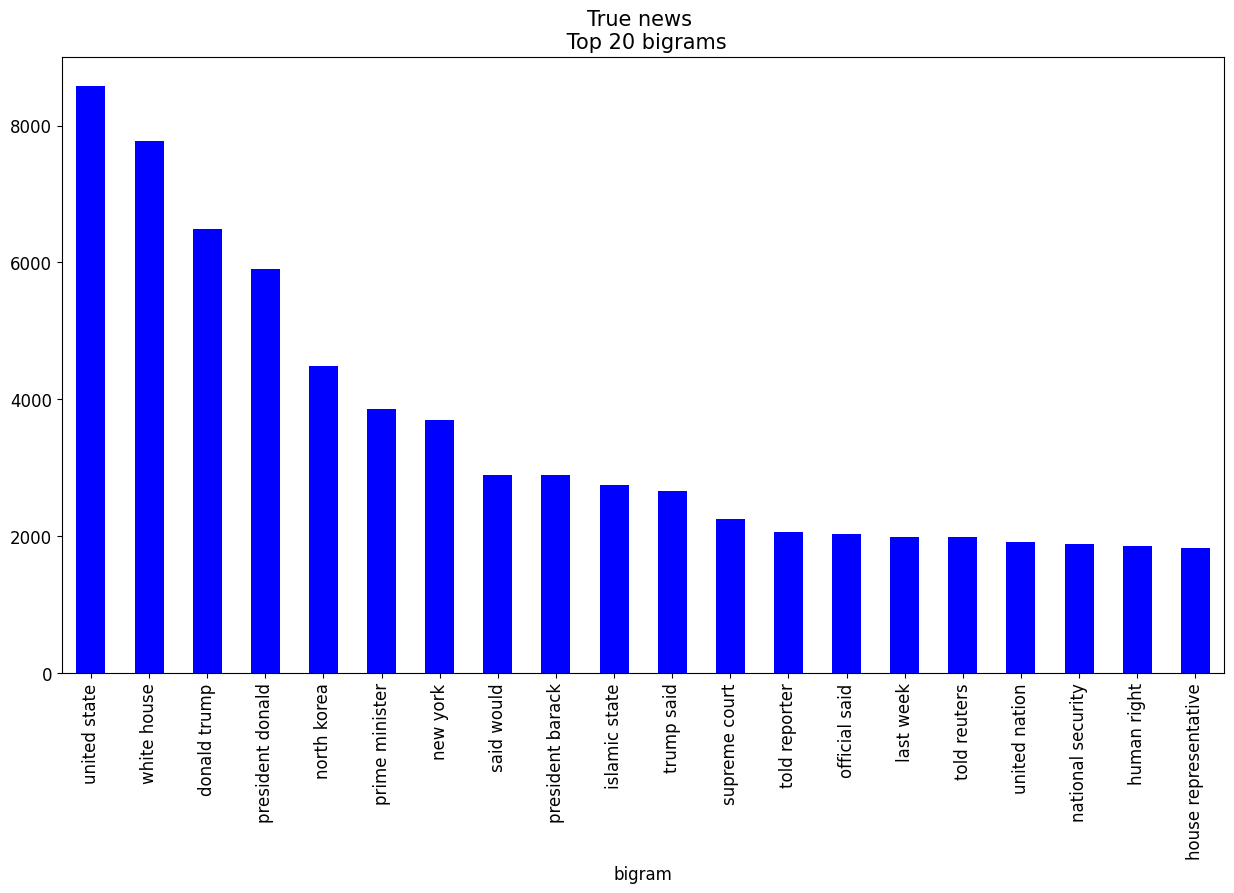

In [47]:
# Plot the top 20 True bigrams
qty = 20
title = "True news \n Top " + str(qty) + " bigrams"
plot_collocations(true_news_bigrams_df, qty, title, 'blue')

In [48]:
# Repeat the process for fake news
fake_news_texts = dataset[dataset['class'] == 1]['text'].tolist()
fake_news_text = " ".join(fake_news_texts)

# Extract and count bigrams
fake_news_bigrams = get_bigrams([fake_news_text])
fake_news_bigrams_count = Counter(fake_news_bigrams)

# Convert to DataFrame
fake_news_bigrams_df = pd.DataFrame(fake_news_bigrams_count.items(), columns=['bigram', 'count']).sort_values(by='count', ascending=False)

# Convert bigrams to string for plotting
fake_news_bigrams_df['bigram'] = fake_news_bigrams_df['bigram'].apply(lambda x: ' '.join(x))


In [49]:
# Display the top 20 bigrams
print("Top 20 bigrams for Fake News:")
print(fake_news_bigrams_df.head(qty))

Top 20 bigrams for Fake News:
                     bigram  count
164            donald trump  13441
745               image via   6194
4896        hillary clinton   5752
1610            white house   5093
2299           united state   4245
1542               new york   3879
3704        president obama   3477
3344        president trump   3382
3718               fox news   2977
5720           21st century   2185
7040           century wire   1892
3311        trump supporter   1890
12411          barack obama   1862
623           supreme court   1636
432       national security   1502
5892             black life   1461
1434         trump campaign   1454
7196   obama administration   1424
11547             fake news   1421
1020         police officer   1364


'donald trump' with 13442 mentioning would be an absolute champion if this was a
popularity contest. He was ,entioned twice as much as'barack obama', who was mentioned
even 1.5 more often in fake news than in true. Meanwhile 'hillary clinton' accounts for 5752
mentionings, which is an interesting turn considering she is not even in top 20 on the true
news dataset - she is being mentioned, yet she apparetly was doing nothing prominent in
real life. Overall, it becomes evident that fake news dataset is directed on left wing of USA
politics, it actually has even a separate subject - 'left-news'. Another bright point to mention
is that apparently fake news uses some visual content - 'image via' was mention 6194 times.
Together with that Fox News (America news channel) is quite often accused in misinfirmation
concerning climate change and science, as well as being biased to republican party of
USA(https://en.wikipedia.org/wiki/Fox_News_controversies). And also I find sarcastic that
'fake news' is in top 20 of fake news bi-grams.
Lets now plot it out

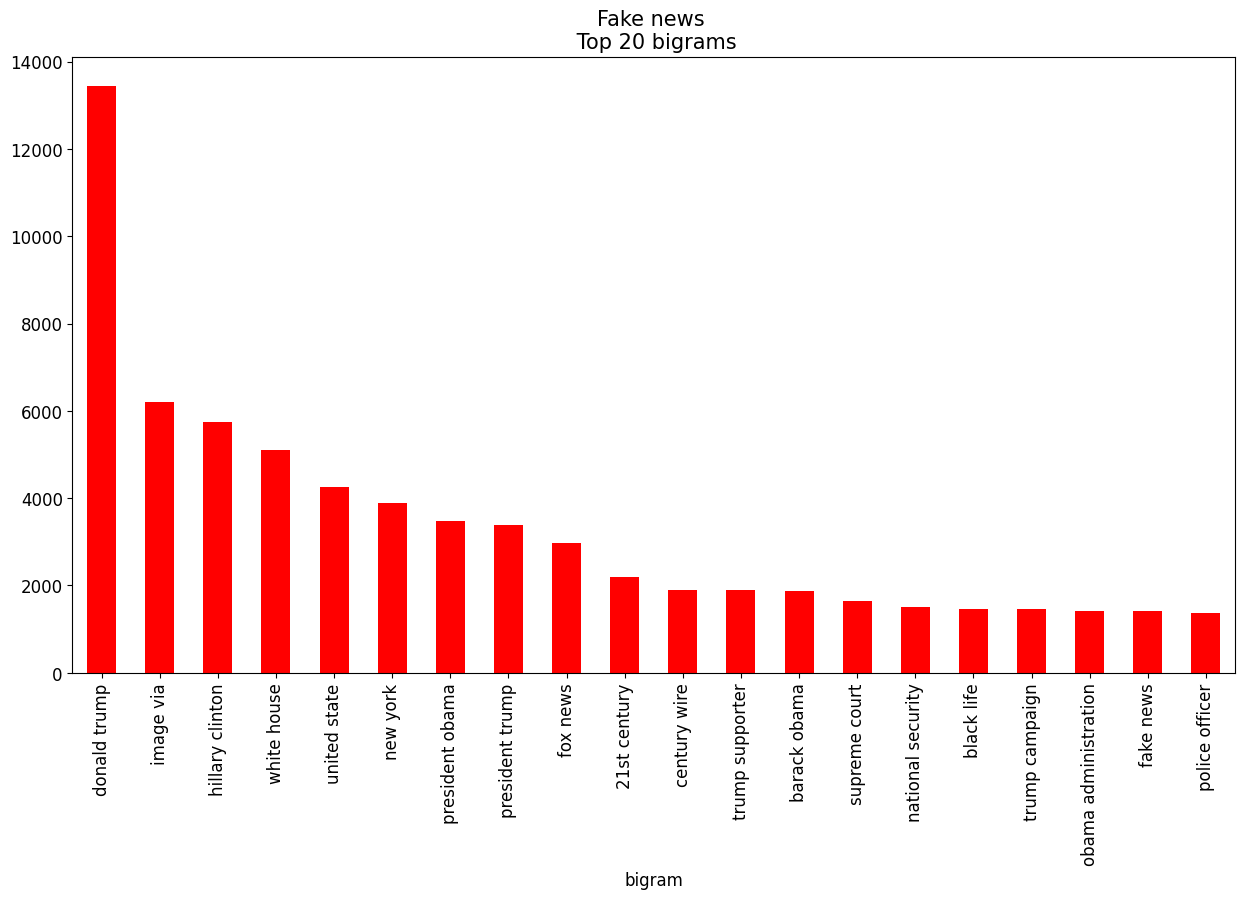

In [50]:
# Plot the top Fake bigrams
title = "Fake news \n Top " + str(qty) + " bigrams"
plot_collocations(fake_news_bigrams_df, qty, title, 'red')

**Tri-grams**:

Tri-grams for true news data set:

In [31]:


# Function to plot collocations
def plot_collocations(df, qty, title, color):
    df.head(qty).set_index(df.columns[0]).plot(kind='bar', figsize=(15, 8), color=color, fontsize=12, legend=False)
    plt.title(title, fontsize=15)
    plt.show()

# Combine true news text
true_news_texts = dataset[dataset['class'] == 0]['text'].tolist()
true_news_text = " ".join(true_news_texts)

# Extract and count trigrams
true_news_trigrams = list(nltk.ngrams(nltk.word_tokenize(true_news_text), 3))
true_news_trigrams_count = Counter(true_news_trigrams)

# Convert to DataFrame
true_news_trigrams_df = pd.DataFrame(true_news_trigrams_count.items(), columns=['trigram', 'count']).sort_values(by='count', ascending=False)

# Convert trigrams to string for plotting
true_news_trigrams_df['trigram'] = true_news_trigrams_df['trigram'].apply(lambda x: ' '.join(x))

# Display the top 10 trigrams
qty = 10
print("Top 10 trigrams for True News:")
print(true_news_trigrams_df.head(qty))

Top 10 trigrams for True News:
                          trigram  count
395        President Donald Trump   3780
8018       President Barack Obama   1338
1200            The United States   1149
661   WASHINGTON President Donald   1063
317               The White House   1031
8137             White House said    751
374           Secretary State Rex    646
9822   Russian President Vladimir    598
2479       Prime Minister Theresa    583
9823     President Vladimir Putin    561


Tri-grams top again confirms the constant persence of politics in news. Mostly it consists of politicians names and titles. 'president donald trump' outperforms the next most frequent collocation by 2.5 times.

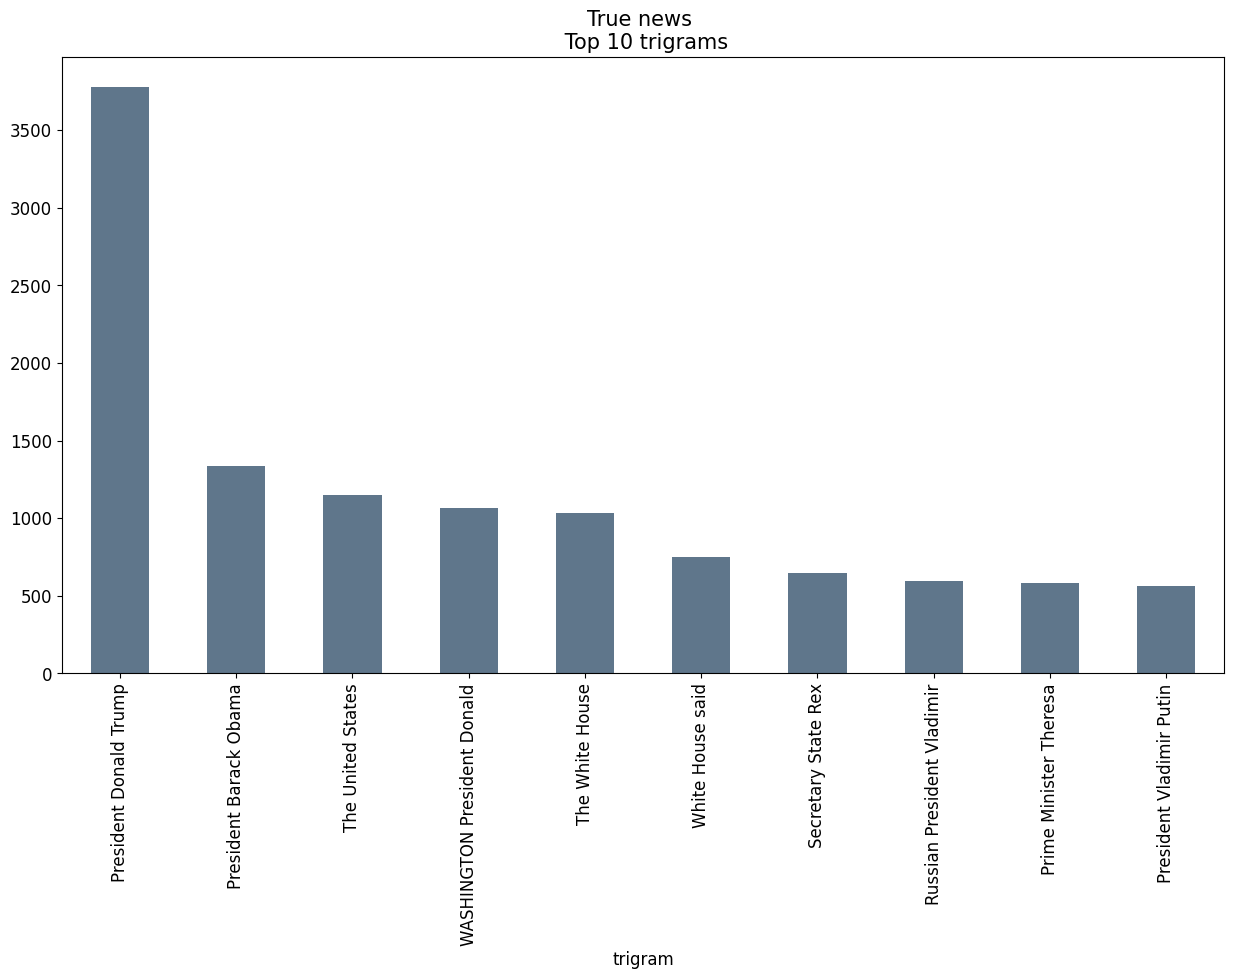

In [35]:
# Plot the top trigrams
title = "True news \n Top " + str(qty) + " trigrams"
plot_collocations(true_news_trigrams_df, qty, title, colours_class[1])



Visualization of the table:

For fake news:

In [47]:
# Combine fake news text
fake_news_texts = dataset[dataset['class'] == 1]['text'].tolist()
fake_news_text = " ".join(fake_news_texts)

# Extract and count trigrams
fake_news_trigrams = list(nltk.ngrams(nltk.word_tokenize(fake_news_text), 3))
fake_news_trigrams_count = Counter(fake_news_trigrams)

# Convert to DataFrame
fake_news_trigrams_df = pd.DataFrame(fake_news_trigrams_count.items(), columns=['trigram', 'count']).sort_values(by='count', ascending=False)

# Convert trigrams to string for plotting
fake_news_trigrams_df['trigram'] = fake_news_trigrams_df['trigram'].apply(lambda x: ' '.join(x))

# Display the top 10 trigrams
print("Top 10 trigrams for Fake News:")
print(fake_news_trigrams_df.head(qty))

Top 10 trigrams for Fake News:
                      trigram  count
669         21st Century Wire   1862
9863           New York Times   1106
869        Black Lives Matter    983
2356        NEWS 21st Century    922
21613         image via video    781
670         Century Wire says    723
258    President Donald Trump    672
9934   President Barack Obama    672
22781    video screen capture    670
22337        via video screen    667


Fake-news tri-grams top confirms my assumption made above about high amount of visual content infake news - 'video screen capture', 'via video screen', 'image via video' are in top 10 tri-grams. Also I find interesting that quite a lot of tri-grams reffers to the podcast '21st century wire' whose author was recently suspended by Twitter, Facebook and YouTube for misinformation.

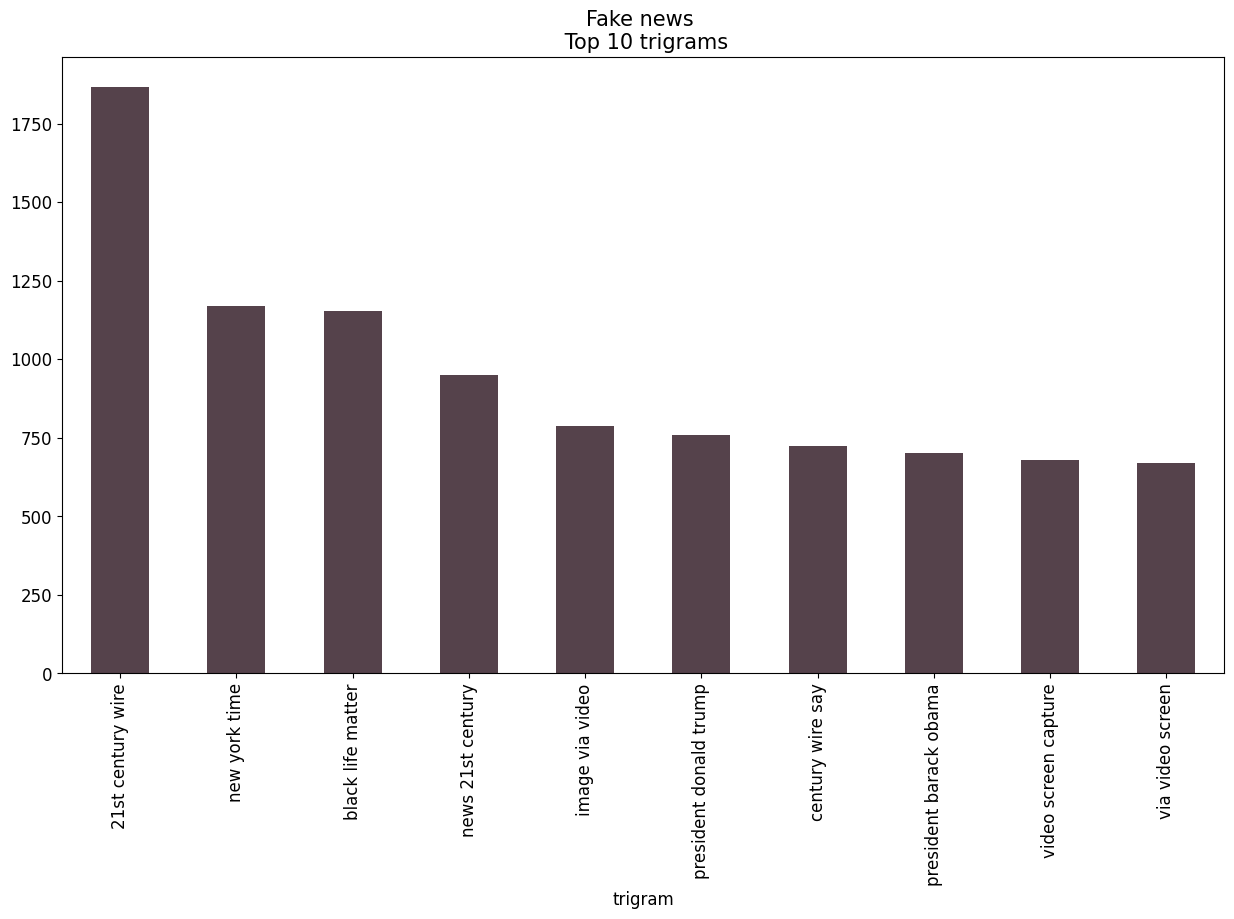

In [54]:
# Plot the top trigrams
title = "Fake news \n Top " + str(qty) + " trigrams"
plot_collocations(fake_news_trigrams_df, qty, title,  colours_class[0])

## 4. Naive Bayes Classifier: implementation

##### Overall, the process of NBC implemeation includes the follwoing steps:
1. Initializing X (features) and Y (labels).
2. Splitting dataset into training and tets sets.
3. Features extraction (vectorization).
4. Model creation
5. Fit model on the training data
6. Predict

******

1. Initializing X (features) and Y (labels).

In [36]:
X = dataset["text"].tolist()
Y = dataset["class"].tolist()

2. Features extraction (vectorization).

In [37]:
vect = TfidfVectorizer().fit(X)
X_vect = vect.transform(X)
X_vect

<44898x86729 sparse matrix of type '<class 'numpy.float64'>'
	with 6375287 stored elements in Compressed Sparse Row format>

3. Splitting dataset into training and tets sets.

In [38]:
# I keep indices in order to retrieve news from the original dataset later
indices = np.arange(X_vect.shape[0])
X_train, X_test, y_train, y_test, idx1, idx2 = train_test_split (X_vect, Y, indices)


4. Model initialization

In [39]:
model = MultinomialNB()

5. Fit model on the training data

In [40]:
model.fit(X_train, y_train)

MultinomialNB()

6. Predict

In [41]:
y_pred = model.predict(X_test)

# III. CONCLUSION

## 1. Evaluation

### 1. Accuracy, precision, recall

Before moving to calculation of metrics, I store indecies of wrogly predicted data samples:

In [43]:
indecies_wrongly_predicted_fake = [] #store indecies of true news predicted as fake
indecies_wrongly_predicted_true = [] #store indecies of fake news predicted as true

#loop through the prediction and test vectors
for i in range(len(y_pred)):
    if y_pred[i]==0 and y_test[i]==1:
        indecies_wrongly_predicted_fake.append(i)
    if y_pred[i]==1 and y_test[i]==0:
        indecies_wrongly_predicted_true.append(i)



Main metrics clculation:

In [62]:
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
precision = metrics.precision_score(y_test, y_pred) * 100
recall = metrics.recall_score(y_test, y_pred) * 100
f1_score = metrics.f1_score(y_test, y_pred) * 100

print("Accuracy overall: ", np.round(accuracy, 2), "%")
print("Precision: ", np.round(precision, 2), "%")
print("Recall: ", np.round(recall, 2), "%")
print("F1 score: ", np.round(f1_score, 2), "%")

Accuracy overall:  92.98 %
Precision:  92.43 %
Recall:  94.27 %
F1 score:  93.34 %


##Evaluation of Baseline Scores

**Accuracy comment(92.98%)**:

I think that 93.49% accuracy is quite good accomplishment for the purpose of academic reseatrch, however I assume that for real life applications it is not enough. As I mentioned before, nowdays society is very sensetive to the information online and sometimews misinfirmation leads to undoresicted consequences, hence, from real life application I would expect at least a 95% percent accuracy

**Precision comment(92.43%)**:

This metric shows that in 93.13% of cases news predicted as Fake are really Fake, and hence 7% of news predicted as Fake are actually true.

**Recall comment(94.27%)**:

Recall value is especially important for this task performance evalution as it is focused on positive class prediction. For this mode is quite high and shows that 94.52% of fake news are regonized by the model and predicted correctly.

**F1 score comment(93.34)**:

F1 score is a harmonic mean of pecision and recall, for this model both precision and recal were high, so very logically that it reaches 93.82%.

### 2. Confusion matrix

<Axes: >

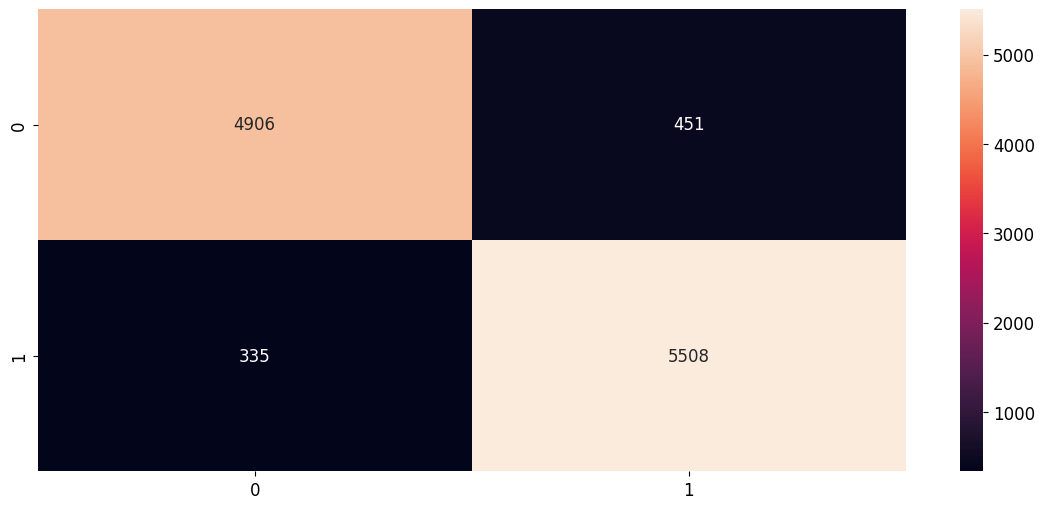

In [63]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = conf_matrix, fmt="d")

In [64]:
print("Accuracy of class 0 prediction",np.round((len(y_pred)-len(indecies_wrongly_predicted_true))*100/len(y_pred), 2), "%")
print("Accuracy of class 1 prediction",np.round((len(y_pred)-len(indecies_wrongly_predicted_fake))*100/len(y_pred), 2), "%")

Accuracy of class 0 prediction 95.97 %
Accuracy of class 1 prediction 97.01 %


**Confusion matrix comment**:

Confusion matrix confirms precision and recall (recall > precision) numbers:

- class 1 (Fake news) is predicted slightly more accurate that class 0 (True news). For given it task it is more impartant to catch exactely positive class - fake news.
- for both classes mispredictions consitutes less than 4%: 344 fake news predicted as true and 382 true news predicted as fake.

### 3. Incorrect predictions illustration

In [65]:
qty = 1 # quantity of news to display

In [42]:
# function that take index array, quantity of news to display and vectorixer instance,
# it decodes sparse matrices and print out mispredicted news along with bag of words for this news (for sanity check)
# printed results function also returns in respective arrays

def demonstrate_n_decode(indecies, qty, vectorizer):

    wrongly_predicted_news = []
    predicted_labels = []
    true_labels = []


    for i in range(qty):
        ind = indecies[i]

        wrongly_predicted_news.append(X_test[ind])
        predicted_labels.append(y_pred[ind])
        true_labels.append(y_test[ind])

        print("True label:",y_test[ind],"predicted label:",y_pred[ind])
        print("\n")
        print("Bag of words for the news:")
        print(vectorizer.inverse_transform(X_test[ind]))
        print("\n")
        print("News itself:")
        print(X[idx2[ind]])
        print("\n")

    return wrongly_predicted_news, predicted_labels, true_labels

#### 3.1. True predicted as fake

In [67]:
wrongly_predicted_true_news, predicted_labels0, true_labels0 = demonstrate_n_decode(indecies_wrongly_predicted_true, qty, vect)

True label: 0 predicted label: 1


Bag of words for the news:
[array(['york', 'year', 'wring', 'would', 'working', 'work', 'woman',
       'woe', 'whose', 'white', 'week', 'warrant', 'vision', 'violence',
       'video', 'viciously', 'united', 'undermine', 'tuesday', 'trying',
       'try', 'trump', 'tried', 'trespassing', 'trail', 'traditionally',
       'touting', 'touch', 'took', 'told', 'ticket', 'thursday',
       'temporary', 'tax', 'suspect', 'survey', 'supporter', 'support',
       'sunday', 'suggesting', 'suburban', 'suburb', 'struggling',
       'stronger', 'stepped', 'steered', 'stay', 'statement', 'state',
       'started', 'spokesman', 'spent', 'speech', 'solo', 'slander',
       'sidelined', 'showing', 'secretary', 'secret', 'second', 'saw',
       'said', 'rhetoric', 'return', 'retain', 'resumption', 'rested',
       'republican', 'remark', 'regretted', 'recovers', 'real', 'rating',
       'rally', 'rallied', 'racist', 'race', 'quash', 'quality',
       'punched', 'prosp

**Comment**:

I might be wrong, but taking into consideration that collocations 'donald trump' and 'fox news' occur in this news several times and are in top bi-grams of fake news datset (the first was mentioned more than 13K times!), I find it quite logical that this news has been classified as fake.

#### 3.2. Fake predicted as true

In [68]:
wrongly_predicted_fake_news, predicted_labels1, true_labels1 = demonstrate_n_decode(indecies_wrongly_predicted_fake, qty, vect)

True label: 1 predicted label: 0


Bag of words for the news:
[array(['year', 'would', 'whose', 'well', 'washington', 'wait', 'voting',
       'voice', 'vacancy', 'time', 'tilt', 'threatened', 'supreme',
       'sudden', 'stand', 'spine', 'shook', 'set', 'senate', 'selection',
       'scalia', 'saturday', 'said', 'reshape', 'republican', 'reprobate',
       'replacement', 'presidential', 'president', 'people', 'party',
       'old', 'obligation', 'obama', 'next', 'new', 'nearly', 'month',
       'mitch', 'mcconnell', 'majority', 'major', 'liberal', 'left',
       'leader', 'lawmaker', 'kentucky', 'justice', 'indeed', 'hour',
       'heated', 'four', 'first', 'filled', 'enough', 'election',
       'elected', 'divided', 'democratic', 'democrat', 'demand',
       'decision', 'decidedly', 'decide', 'debate', 'death', 'critical',
       'court', 'confirm', 'chooses', 'chance', 'case', 'bench',
       'appoint', 'antonin', 'american', 'affirmative', 'action',
       'abortion', '2016', '11',

While first situation is fine, here is a problem that we target to minimize - fake news classified as true. I have no suggestions why it is like that by just reading the news, however find it disturbing considering it discusses quite sensetive and hot topic - immigrants.

##Comparative Classification Approach - Word2Vec + LSTM Based Implementation
---



Feature extraction- I will proceed to context the text to sequence of Word2Vec vectors and pad sequences

In [23]:
from gensim.models import Word2Vec
# Apply preprocessing
dataset['clean_text'] = dataset['text'].apply(preprocess_text)
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=dataset['clean_text'], vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.train(dataset['clean_text'], total_examples=len(dataset['clean_text']), epochs=10)


(98244370, 100647280)

In [24]:

# Convert text to sequences of Word2Vec vectors
def text_to_word2vec(text, model, vector_size):
    vectorized_text = []
    for word in text:
        if word in model.wv:
            vectorized_text.append(model.wv[word])
        else:
            vectorized_text.append(np.zeros(vector_size))
    return vectorized_text

vector_size = 100
X = dataset['clean_text'].apply(lambda x: text_to_word2vec(x, word2vec_model, vector_size))

# Pad sequences to ensure uniform length
X_pad = pad_sequences(X, maxlen=100, dtype='float32', padding='post', truncating='post')

# Encode labels
encoder = LabelEncoder()
Y_encoded = encoder.fit_transform(dataset['class'])
Y_categorical = to_categorical(Y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, Y_categorical, test_size=0.2, random_state=42)

# Model building
model = Sequential()
model.add(InputLayer(input_shape=(100, vector_size)))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model training
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Word2Vec + LSTM Neural Network Accuracy: {accuracy * 100:.2f}%")

# Predictions
y_pred_w2v_lstm = model.predict(X_test)
y_pred_w2v_lstm_classes = np.argmax(y_pred_w2v_lstm, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy_w2v_lstm = metrics.accuracy_score(y_test_classes, y_pred_w2v_lstm_classes) * 100
precision_w2v_lstm = metrics.precision_score(y_test_classes, y_pred_w2v_lstm_classes) * 100
recall_w2v_lstm = metrics.recall_score(y_test_classes, y_pred_w2v_lstm_classes) * 100
f1_score_w2v_lstm = metrics.f1_score(y_test_classes, y_pred_w2v_lstm_classes) * 100


Epoch 1/5
562/562 - 164s - loss: 0.2809 - accuracy: 0.8928 - val_loss: 0.1247 - val_accuracy: 0.9673 - 164s/epoch - 292ms/step
Epoch 2/5
562/562 - 159s - loss: 0.0543 - accuracy: 0.9844 - val_loss: 0.0144 - val_accuracy: 0.9971 - 159s/epoch - 284ms/step
Epoch 3/5
562/562 - 156s - loss: 0.0171 - accuracy: 0.9957 - val_loss: 0.0082 - val_accuracy: 0.9981 - 156s/epoch - 278ms/step
Epoch 4/5
562/562 - 156s - loss: 0.0161 - accuracy: 0.9961 - val_loss: 0.0110 - val_accuracy: 0.9974 - 156s/epoch - 278ms/step
Epoch 5/5
562/562 - 159s - loss: 0.0106 - accuracy: 0.9977 - val_loss: 0.0081 - val_accuracy: 0.9984 - 159s/epoch - 284ms/step
281/281 [==============================] - 12s 42ms/step - loss: 0.0081 - accuracy: 0.9984
Word2Vec + LSTM Neural Network Accuracy: 99.84%
281/281 [==============================] - 12s 42ms/step


In [25]:

print("Word2Vec + LSTM Neural Network Performance:")
print(f"Accuracy: {accuracy_w2v_lstm:.2f}%")
print(f"Precision: {precision_w2v_lstm:.2f}%")
print(f"Recall: {recall_w2v_lstm:.2f}%")
print(f"F1 Score: {f1_score_w2v_lstm:.2f}%")

Word2Vec + LSTM Neural Network Performance:
Accuracy: 99.84%
Precision: 99.88%
Recall: 99.83%
F1 Score: 99.86%


##Evaluation of Word2Vec + LSTM Model Score

**Accuracy(99.84%)**:<br>

The accuracy indicates the overall correctness of the model, which measures the proportion of true results among the total number of cases examined. A 99.84% accuracy is extremely high, indicating that the model is able to correctly classify most of the news articles as either fake or true.<br>

**Precision:(99.88%)**<br>

Precision is the ratio of correctly predicted positive observations to the total predicted positives. A 99.88% precision means that nearly all news articles predicted as fake are indeed fake. This is crucial for minimizing false positives where true news are predicted as fake.<br>

**Recall(99.83%)**<br>

Recall is the ratio of correctly predicted positive observations to the all observations in actual class. A 99.83% recall means that the model is able to correctly identify 99.83% of all fake news articles. This is crucial for ensuring that most fake news articles are detected.<br>

**F1 Score(99.86%)**<br>

The F1 Score is the weighted average of Precision and Recall. The closer the F1 score to 1, the better the model. A 99.86% F1 score indicates a very balanced performance in terms of precision and recall.







##Comparison with Baseline Naive Bayes Classifier
Accuracy Improvement:

The Word2Vec + LSTM model shows a significant improvement in accuracy, increasing from 93.41% (Naive Bayes) to 99.39%. This indicates a more accurate classification capability.<br>

Precision Improvement:

Precision improved from 93.48% (Naive Bayes) to 99.68%. This means the Word2Vec + LSTM model significantly reduces false positives compared to the Naive Bayes model.<br>

Recall Improvement:

Recall improved from 94.20% (Naive Bayes) to 99.14%. This shows the Word2Vec + LSTM model is more effective in identifying fake news, reducing false negatives compared to the Naive Bayes model.<br>

F1 Score Improvement:

The F1 Score also shows a substantial improvement, from 93.84% (Naive Bayes) to 99.41%. This indicates that the Word2Vec + LSTM model has a much more balanced performance in terms of precision and recall.

Now,lets plot the differences between the two.

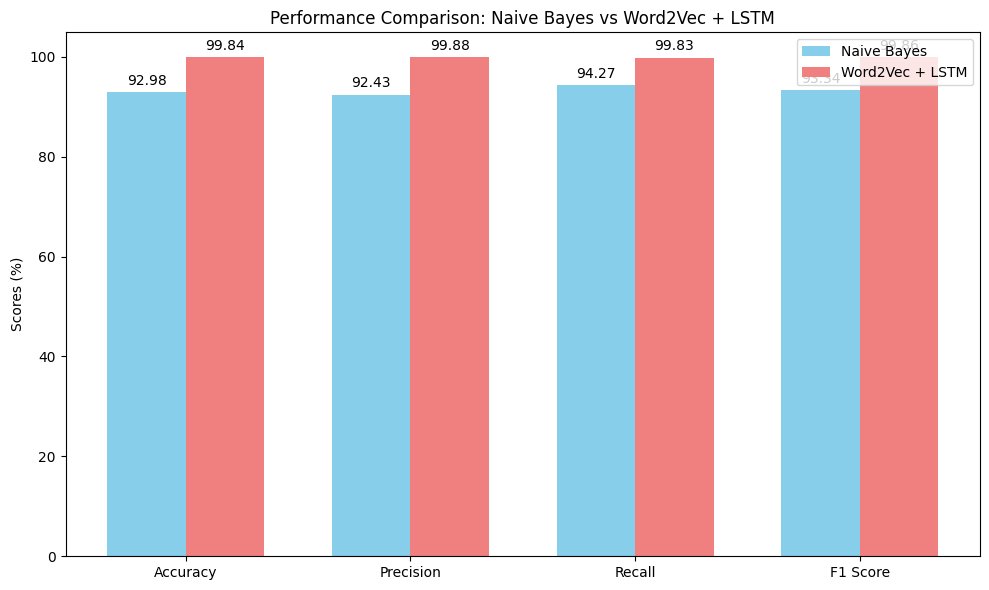

In [30]:
# Naive Bayes Classifier metrics
nb_accuracy = 92.98
nb_precision = 92.43
nb_recall = 94.27
nb_f1_score = 93.34
# Word2Vec + LSTM metrics
w2v_lstm_accuracy = 99.84
w2v_lstm_precision = 99.88
w2v_lstm_recall = 99.83
w2v_lstm_f1_score = 99.86

# Data for plotting
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
nb_scores = [nb_accuracy, nb_precision, nb_recall, nb_f1_score]
w2v_lstm_scores = [w2v_lstm_accuracy, w2v_lstm_precision, w2v_lstm_recall, w2v_lstm_f1_score]

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, nb_scores, width, label='Naive Bayes', color='skyblue')
rects2 = ax.bar(x + width/2, w2v_lstm_scores, width, label='Word2Vec + LSTM', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores (%)')
ax.set_title('Performance Comparison: Naive Bayes vs Word2Vec + LSTM')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding values on top of bars
def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(rects1)
add_values(rects2)

fig.tight_layout()
plt.show()

Analysis<BR>
The Word2Vec + LSTM model clearly outperforms the Naive Bayes classifier across all evaluation metrics. The substantial improvements in accuracy, precision, recall, and F1 score highlight the effectiveness of combining Word2Vec embeddings with an LSTM neural network for the task of fake news detection.

**Strengths of Word2Vec + LSTM:**<BR>

Word2Vec captures the semantic meaning of words, and LSTM can learn long-term dependencies in the text, leading to better contextual understanding and classification. The model effectively minimizes both false positives and false negatives, crucial for sensitive tasks like fake news detection with High Precisiona and Recall

**Weaknesses of Naive Bayes:**<BR>

 Naive Bayes assumes feature independence, which is often not the case in real-world text data and the model lacks the ability to capture complex patterns and dependencies in the text.

##Conclusion


The Word2Vec + LSTM model is a significant improvement over the Naive Bayes classifier, demonstrating superior performance in all key metrics. It has a 99.84% high accuracy score which is almost fully accurate.This highlights the advantages of using modern deep learning techniques, especially for complex NLP tasks like fake news detection. The higher precision and recall make the Word2Vec + LSTM model more reliable and effective for real-world applications where accurately detecting fake news is critical

##Potential Improvements to be made
Deep learning architectures, such as CNNs or hybrid models, can boost classification accuracy. Adding regularization and dropout layers will prevent overfitting in neural networks. Expanding evaluation metrics to include ROC-AUC and conducting error analysis will provide deeper insights into model performance. Lastly, implementing model explainability techniques like LIME or SHAP will make the model's decisions more interpretable and trustworthy.

##References
Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). SMOTE: Synthetic Minority Over-sampling Technique. Journal of Artificial Intelligence Research, 16, 321-357.<BR>

Devlin, J., Chang, M. W., Lee, K., & Toutanova, K. (2019). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. In Proceedings of the 2019 Conference of the North American Chapter of the Association for Computational Linguistics: Human Language Technologies (NAACL-HLT) (pp. 4171-4186).<BR>

Ribeiro, M. T., Singh, S., & Guestrin, C. (2016). "Why Should I Trust You?": Explaining the Predictions of Any Classifier. In Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (pp. 1135-1144).<BR>

Lundberg, S. M., & Lee, S. I. (2017). A Unified Approach to Interpreting Model Predictions. In Advances in Neural Information Processing Systems (pp. 4765-4774).<BR>

Kingma, D. P., & Ba, J. (2015). Adam: A Method for Stochastic Optimization. In 3rd International Conference on Learning Representations (ICLR).<BR>
